In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

no_effort_df = pd.read_csv("2. Scenarios/No Action/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_0.0_CC_0/global_stocks.csv", delimiter=";")
low_effort_df = pd.read_csv("2. Scenarios/Low Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_0/global_stocks.csv", delimiter=";")
med_effort_df = pd.read_csv("2. Scenarios/Medium Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_1/global_stocks.csv", delimiter=";")
high_effort_df = pd.read_csv("2. Scenarios/High Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_2/global_stocks.csv", delimiter=";")

SAVEPATH = "./2. Scenarios/Plots"
SAVEPATH_COUNTRY = f"{SAVEPATH}/CountryPlots"

In [54]:
no_effort_df = no_effort_df[no_effort_df["Year"] != 2101]
low_effort_df = low_effort_df[low_effort_df["Year"] != 2101]
med_effort_df = med_effort_df[med_effort_df["Year"] != 2101]
high_effort_df = high_effort_df[high_effort_df["Year"] != 2101]

In [55]:
no_effort_df

,Year,CO2 Concentration,CO2 ConcentrationPPM,Forest Area,Global Temperature
0,2015,3.115320e+06,399.40000,4.061815e+07,0.90000
1,2016,3.135212e+06,401.95021,4.058545e+07,0.93685
2,2017,3.155608e+06,404.56512,4.051693e+07,0.97439
3,2018,3.176511e+06,407.24501,4.046844e+07,1.01262
4,2019,3.198323e+06,410.04138,4.041750e+07,1.05224
...,...,...,...,...,...
81,2096,4.880408e+06,625.69332,3.684754e+07,3.49782
82,2097,4.902024e+06,628.46460,3.680688e+07,3.52338
83,2098,4.923632e+06,631.23483,3.676628e+07,3.54881
84,2099,4.945231e+06,634.00400,3.672638e+07,3.57413


In [56]:
def plot_timeseries(col, config):
    # Convert to DataFrame
    effort_colors = {
        'No Effort': '#6C757D',  # Muted Gray
        'Low Effort': '#E63946',  # Soft Red
        'Medium Effort': '#F4A261',  # Warm Orange
        'High Effort': '#2A9D8F'  # Teal Green
    }

    plot_data = {
        "Year": no_effort_df["Year"].to_list(),
        "No Effort": no_effort_df[col].to_list(),
        "Low Effort": low_effort_df[col].to_list(),
        "Medium Effort": med_effort_df[col].to_list(),
        "High Effort": high_effort_df[col].to_list(),
    }
    df = pd.DataFrame(plot_data)

    # Convert to long format for Seaborn
    df_melted = df.melt('Year', var_name='Series', value_name='Value')

    # Set Seaborn style
    sns.set_style('darkgrid')

    # Create the line plot
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df_melted, x='Year', y='Value', hue='Series', palette=effort_colors)

    # Customize labels and title
    plt.xlabel('Year', labelpad=12)
    plt.ylabel(config["yLabel"], labelpad=12)
    plt.title(config["title"], fontsize=14, pad=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.xticks(df['Year'][::5], df['Year'][::5], rotation=45)
    plt.legend(title="Action Effort")
    if config["customYTicks"]:
        plt.yticks(range(config["yTickStart"], config["yTickEnd"], config["yTickSkip"]))
    # Show the plot
    # plt.show()
    plt.savefig(f"{SAVEPATH}/{config['name']}.pdf", format="pdf", bbox_inches="tight")

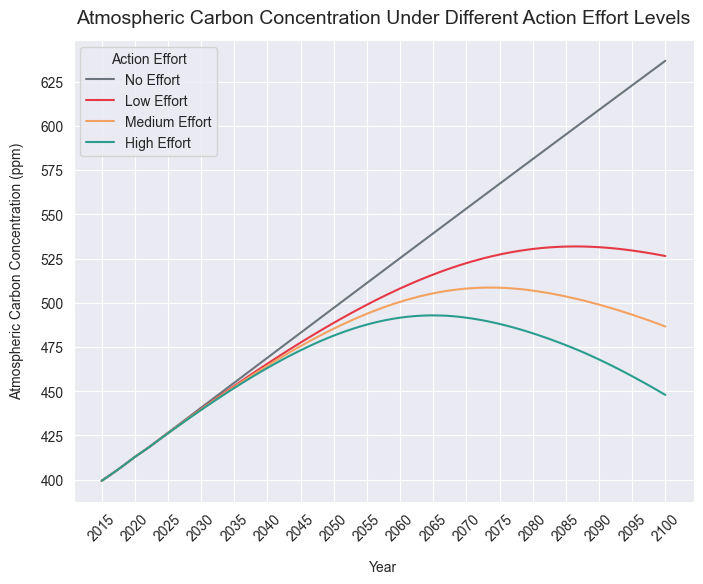

In [57]:
plot_timeseries("CO2 ConcentrationPPM", {
    "yLabel": "Atmospheric Carbon Concentration (ppm)",
    "title": "Atmospheric Carbon Concentration Under Different Action Effort Levels",
    "yTickStart": 400,
    "yTickEnd": 650,
    "yTickSkip": 25,
    "customYTicks": True,
    "name": "timeserie_co2",
})

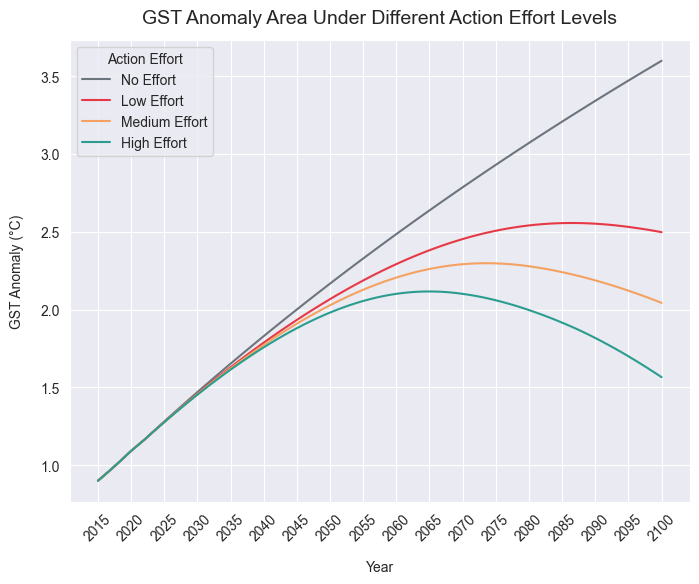

In [58]:
plot_timeseries("Global Temperature", {
    "yLabel": "GST Anomaly (°C)",
    "title": "GST Anomaly Area Under Different Action Effort Levels",
    "customYTicks": False,
    "name": "timeseries_temperature",
})

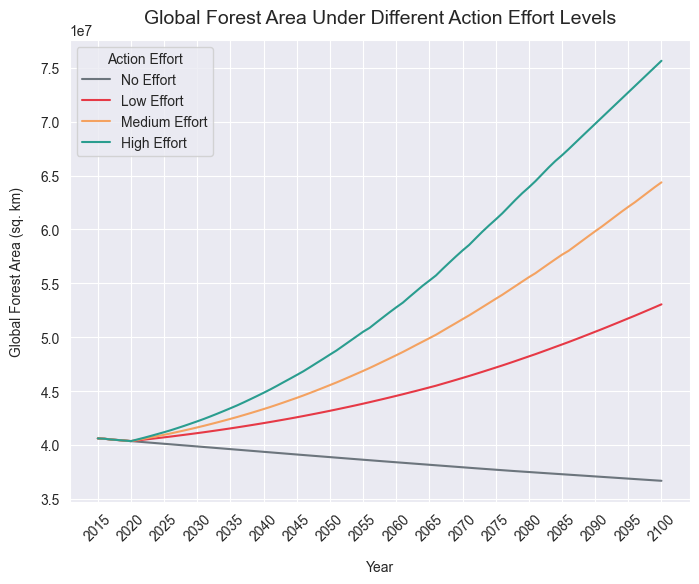

In [59]:
plot_timeseries("Forest Area", {
    "yLabel": "Global Forest Area (sq. km)",
    "title": "Global Forest Area Under Different Action Effort Levels",
    "customYTicks": False,
    "name": "timeseries_forest",
})

### Country Level

In [60]:
no_effort_df = pd.read_csv("2. Scenarios/No Action/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_0.0_CC_0/countries_results.csv", delimiter=";")
low_effort_df = pd.read_csv("2. Scenarios/Low Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_0/countries_results.csv", delimiter=";")
med_effort_df = pd.read_csv("2. Scenarios/Medium Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_1/countries_results.csv", delimiter=";")
high_effort_df = pd.read_csv("2. Scenarios/High Effort/CS_4.0_FOC_3.3_TC_16.0_COC_1.0_CER_1.0_COR_1.0_PFT_1.0_CC_2/countries_results.csv", delimiter=";")

In [61]:
no_effort_df.columns

Index(['Country ID', 'Net Zero 1.5', 'CO2 Emissions 1.5', 'Forest Area 1.5',
       'Net Zero 2.0', 'CO2 Emissions 2.0', 'Forest Area 2.0', 'Net Zero 2050',
       'CO2 Emissions 2050', 'Forest Area 2050', 'Net Zero 2100',
       'CO2 Emissions 2100', 'Forest Area 2100', 'Reforestation Count',
       'Reduce Emission Count', 'Buy Offset Count', 'Do Nothing Count',
       'NDC Achieved Count', 'NDC Failed Count', 'Total Reforestation',
       'Total Emission Reduction', 'Total Carbon Offset Bought',
       'Total Carbon Offset Sold'],
      dtype='object')

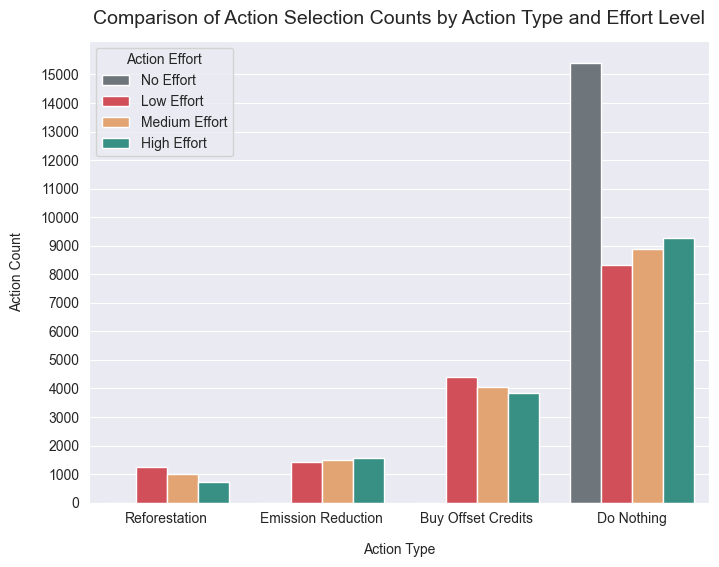

In [62]:
import numpy as np
import matplotlib.pyplot as plt


effort_colors = {
    'No Effort': '#6C757D',  # Muted Gray
    'Low Effort': '#E63946',  # Soft Red
    'Medium Effort': '#F4A261',  # Warm Orange
    'High Effort': '#2A9D8F'  # Teal Green
}

df_wide = pd.DataFrame({
    "Effort Level": ["No Effort", "Low Effort", "Medium Effort", "High Effort"],
    "Reforestation": [
        no_effort_df["Reforestation Count"].sum(),
        low_effort_df["Reforestation Count"].sum(),
        med_effort_df["Reforestation Count"].sum(), 
        high_effort_df["Reforestation Count"].sum()
    ],
    "Emission Reduction": [
        no_effort_df["Reduce Emission Count"].sum(),
        low_effort_df["Reduce Emission Count"].sum(),
        med_effort_df["Reduce Emission Count"].sum(), 
        high_effort_df["Reduce Emission Count"].sum()
    ],
    "Buy Offset Credits": [
        no_effort_df["Buy Offset Count"].sum(),
        low_effort_df["Buy Offset Count"].sum(),
        med_effort_df["Buy Offset Count"].sum(), 
        high_effort_df["Buy Offset Count"].sum()
    ],
    "Do Nothing": [
        no_effort_df["Do Nothing Count"].sum(),
        low_effort_df["Do Nothing Count"].sum(),
        med_effort_df["Do Nothing Count"].sum(), 
        high_effort_df["Do Nothing Count"].sum()
    ],
})

df_long = df_wide.melt(id_vars=["Effort Level"], var_name="Action Type", value_name="Value")

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each subcategory
sns.barplot(data=df_long, x="Action Type", y="Value", hue="Effort Level", palette=effort_colors)

# Formatting
ax.set_xlabel("Action Type", labelpad=12)
ax.set_ylabel("Action Count", labelpad=12)
ax.set_title("Comparison of Action Selection Counts by Action Type and Effort Level", fontsize=14, pad=12)
ax.legend(title="Action Effort")
plt.yticks(range(0, 16000, 1000))

# Show plot
plt.savefig(f"{SAVEPATH}/action_count.pdf", format="pdf", bbox_inches="tight")

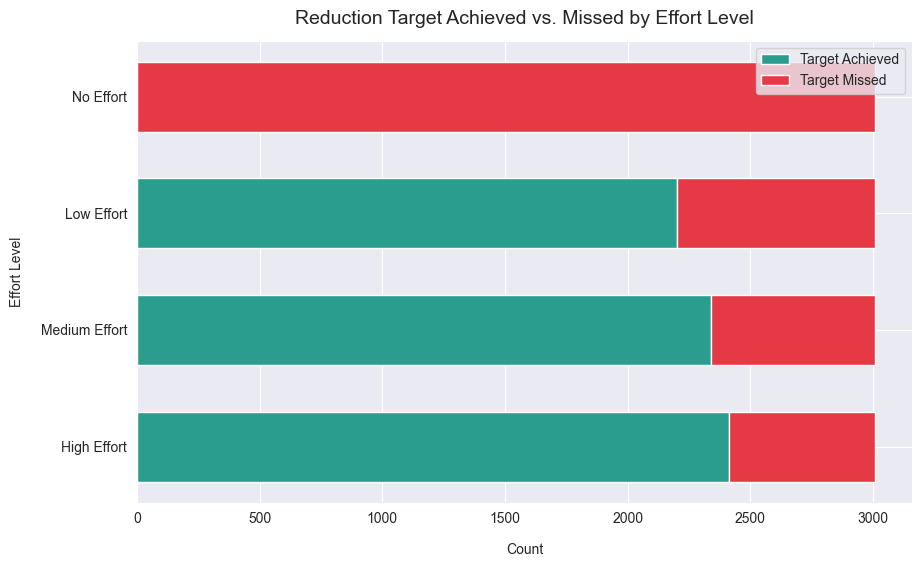

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define effort levels and corresponding target achieved/missed values
effort_levels = ["No Effort", "Low Effort", "Medium Effort", "High Effort"]
target_achieved = [
    no_effort_df["NDC Achieved Count"].sum(),
    low_effort_df["NDC Achieved Count"].sum(),
    med_effort_df["NDC Achieved Count"].sum(), 
    high_effort_df["NDC Achieved Count"].sum()
]  # Example values for targets achieved
target_missed = [
    no_effort_df["NDC Failed Count"].sum(),
    low_effort_df["NDC Failed Count"].sum(),
    med_effort_df["NDC Failed Count"].sum(), 
    high_effort_df["NDC Failed Count"].sum()
]  # Example values for targets achieved

# 'NDC Achieved Count', 'NDC Failed Count',

effort_levels = effort_levels[::-1]
target_achieved = target_achieved[::-1]
target_missed = target_missed[::-1]


# Define bar width
bar_width = 0.6

# Define colors for achieved and missed targets
colors = {
    "Target Achieved": "#2A9D8F",  # Teal Green
    "Target Missed": "#E63946"  # Soft Red
}

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot missed targets first (so achieved stacks on top)
ax.barh(effort_levels, target_achieved, color=colors["Target Achieved"], label="Target Achieved", height=bar_width)
ax.barh(effort_levels, target_missed, color=colors["Target Missed"], left=target_achieved, label="Target Missed", height=bar_width)


# Add labels and title
ax.set_xlabel("Count", labelpad=12)
ax.set_ylabel("Effort Level", labelpad=12)
ax.set_title("Reduction Target Achieved vs. Missed by Effort Level",  fontsize=14, pad=12)

# Add legend
ax.legend(loc="upper right")

# Show the plot
plt.savefig(f"{SAVEPATH}/target_achieved.pdf", format="pdf", bbox_inches="tight")

### Contry Plots

china
usa
india
indonesia
russia
brazil


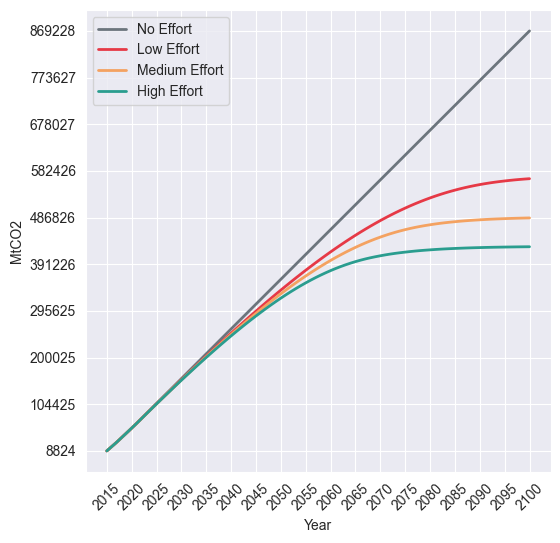

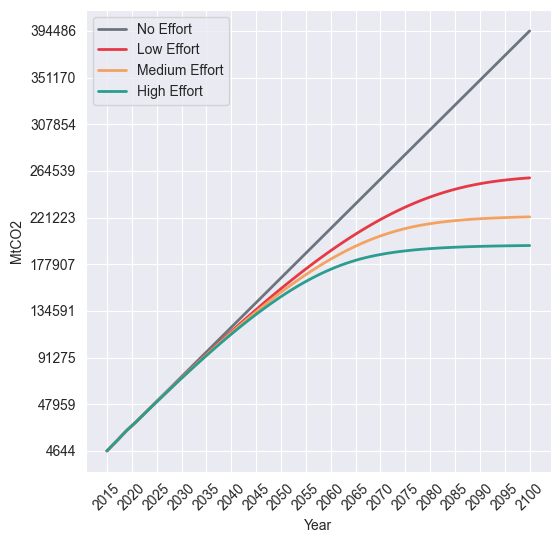

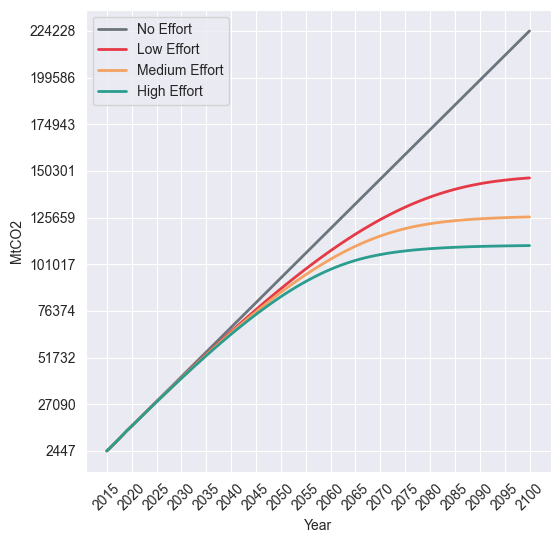

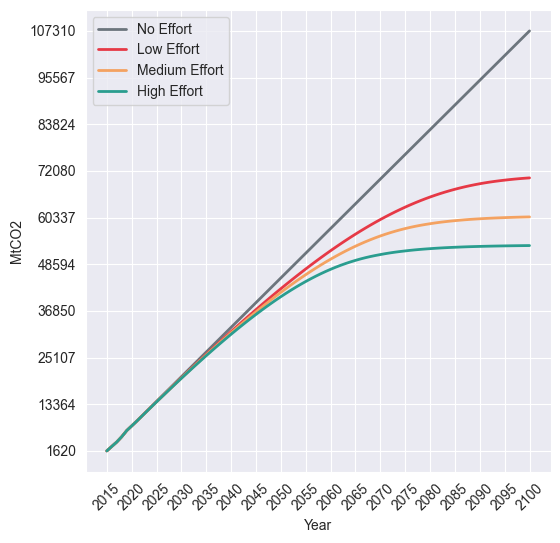

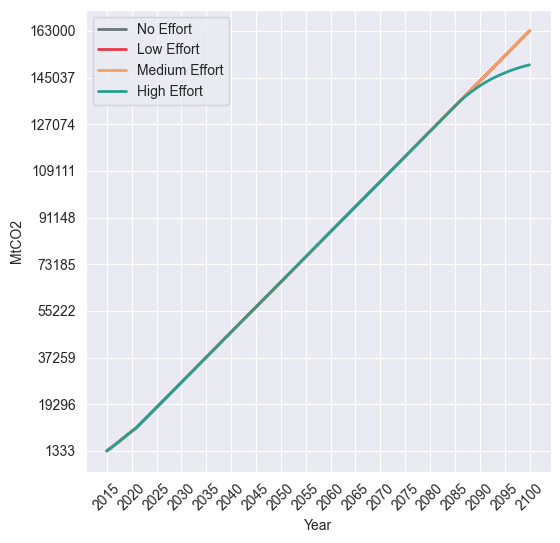

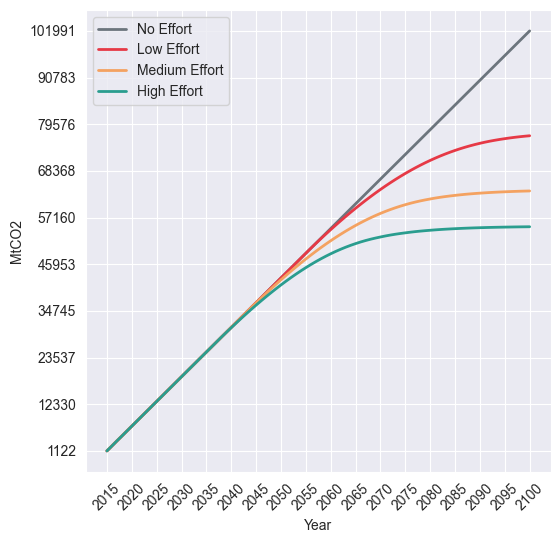

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = "./2. Scenarios/country_carbon_timeseries.xlsx"  # Update with actual path
xls = pd.ExcelFile(file_path)

sns.set_style('darkgrid')


# Define effort levels and their custom colors
effort_colors = {
    'No Effort': '#6C757D',  # Muted Gray
    'Low Effort': '#E63946',  # Soft Red
    'Medium Effort': '#F4A261',  # Warm Orange
    'High Effort': '#2A9D8F'  # Teal Green
}

# Loop through each sheet
for sheet_name in xls.sheet_names:
    # Read the data from the sheet
    df = pd.read_excel(xls, sheet_name)

    # Ensure the first column is the time index (e.g., years)
    df.set_index(df.columns[0], inplace=True)

    # Create the plot
    plt.figure(figsize=(6, 6))
    
    # Plot each effort level with custom colors
    for effort in effort_colors.keys():
        if effort in df.columns:
            plt.plot(df.index, df[effort], label=effort, color=effort_colors[effort], linewidth=2)

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("MtCO2")
    # plt.title(f"Carbon Emissions Over Time - {sheet_name}")
    plt.legend()
    plt.grid(True)
    
     # Set x-ticks every 15 years
    min_year = df.index.min()
    max_year = df.index.max()
    plt.xticks(ticks=np.arange(min_year, max_year + 1, 5), rotation=45)

    # Set exactly 10 y-ticks
    min_y = df.min().min()
    max_y = df.max().max()
    plt.yticks(ticks=np.linspace(min_y, max_y, 10))
    
    print(sheet_name.split(' ')[0].lower())
    # Show the plot
    plt.savefig(f"{SAVEPATH_COUNTRY}/{sheet_name.split(' ')[0].lower()}_emission.pdf", format="pdf", bbox_inches="tight")

Angola
Brazil
Democratic Republic of Congo
Mozambique
Myanmar
Tanzania


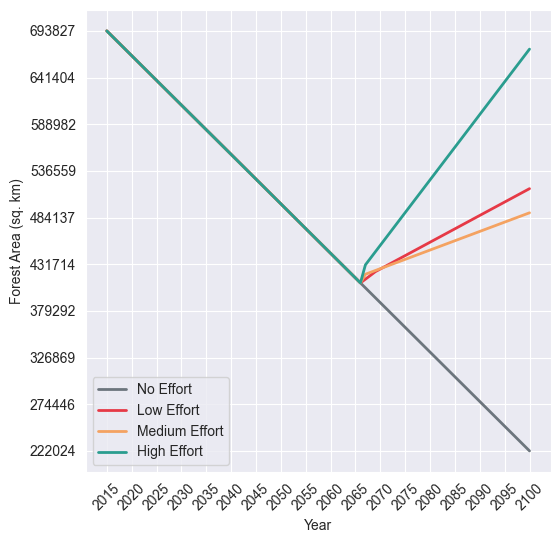

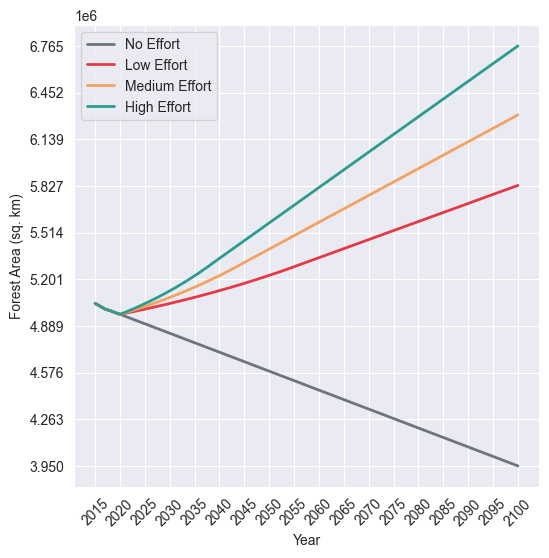

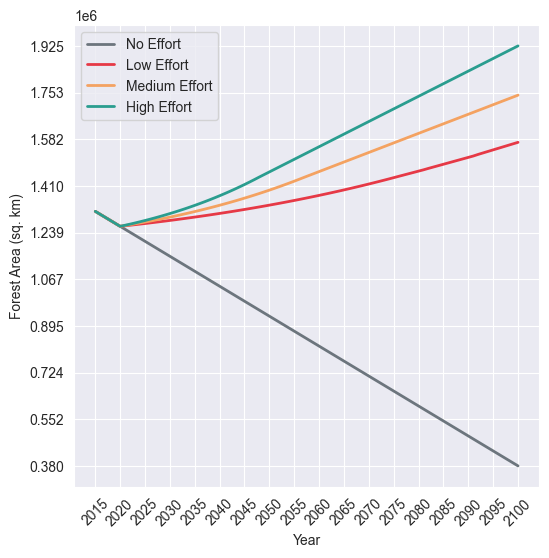

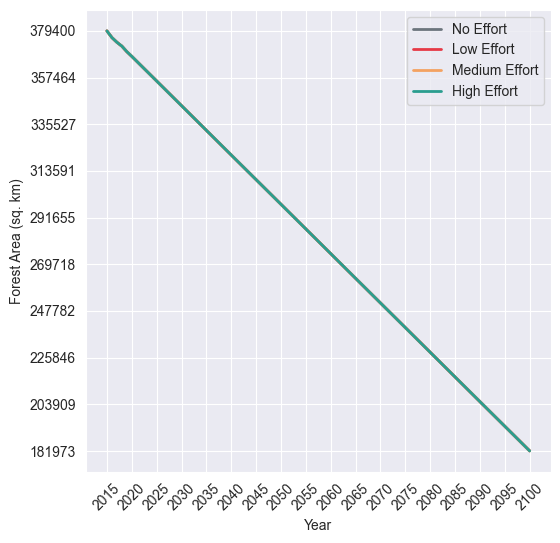

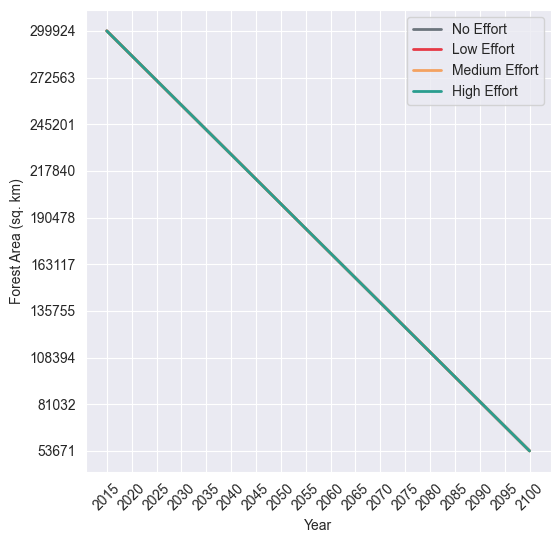

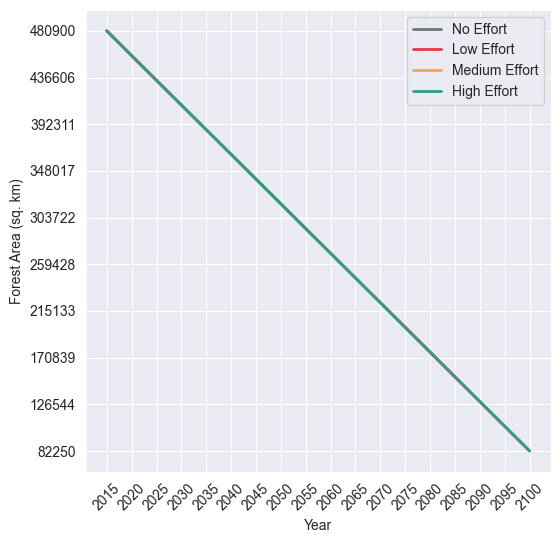

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = "./2. Scenarios/country_forest_timeseries.xlsx"  # Update with actual path
xls = pd.ExcelFile(file_path)

sns.set_style('darkgrid')


# Define effort levels and their custom colors
effort_colors = {
    'No Effort': '#6C757D',  # Muted Gray
    'Low Effort': '#E63946',  # Soft Red
    'Medium Effort': '#F4A261',  # Warm Orange
    'High Effort': '#2A9D8F'  # Teal Green
}

# Loop through each sheet
for sheet_name in xls.sheet_names:
    # Read the data from the sheet
    df = pd.read_excel(xls, sheet_name)

    # Ensure the first column is the time index (e.g., years)
    df.set_index(df.columns[0], inplace=True)

    # Create the plot
    plt.figure(figsize=(6, 6))
    
    # Plot each effort level with custom colors
    for effort in effort_colors.keys():
        if effort in df.columns:
            plt.plot(df.index, df[effort], label=effort, color=effort_colors[effort], linewidth=2)

    # Formatting
    plt.xlabel("Year")
    plt.ylabel("Forest Area (sq. km)")

    plt.legend()
    plt.grid(True)

    print(sheet_name)

    
     # Set x-ticks every 15 years
    min_year = df.index.min()
    max_year = df.index.max()
    plt.xticks(ticks=np.arange(min_year, max_year + 1, 5), rotation=45)

    # Set exactly 10 y-ticks
    min_y = df.min().min()
    max_y = df.max().max()
    plt.yticks(ticks=np.linspace(min_y, max_y, 10))
    
    # Show the plot
    # plt.show()
    plt.savefig(f"{SAVEPATH_COUNTRY}/{sheet_name.split(' ')[0].lower()}_forest.pdf", format="pdf", bbox_inches="tight")